# Shakespeare

In [1]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
from pyspark import SparkFiles

spark = SparkSession.builder.appName('Shakespeare').getOrCreate()

# Ingest Data

In [2]:
romeo_url = 'https://www.gutenberg.org/cache/epub/1513/pg1513.txt'
tempest_url = 'https://www.gutenberg.org/cache/epub/23042/pg23042.txt'
hamlet_url = 'https://www.gutenberg.org/cache/epub/27761/pg27761.txt'
macbeth_url = 'https://www.gutenberg.org/cache/epub/1533/pg1533.txt'
othello_url = 'https://www.gutenberg.org/cache/epub/1531/pg1531.txt'

In [3]:
spark.sparkContext.addFile(romeo_url)
spark.sparkContext.addFile(tempest_url)
spark.sparkContext.addFile(hamlet_url)
spark.sparkContext.addFile(macbeth_url)
spark.sparkContext.addFile(othello_url)

In [4]:
df_romeo = spark.read.text(SparkFiles.get('pg1513.txt'))

In [5]:
df_tempest = spark.read.text(SparkFiles.get('pg23042.txt'))

In [6]:
df_hamlet = spark.read.text(SparkFiles.get('pg27761.txt'))

In [7]:
df_macbeth = spark.read.text(SparkFiles.get('pg1533.txt'))

In [8]:
df_othello = spark.read.text(SparkFiles.get('pg1531.txt'))

# Data Cleaning

In [9]:
df_romeo.show()

+--------------------+
|               value|
+--------------------+
|The Project Guten...|
|                    |
|This ebook is for...|
|most other parts ...|
|whatsoever. You m...|
|of the Project Gu...|
|at www.gutenberg....|
|you will have to ...|
|before using this...|
|                    |
|Title: Romeo and ...|
|                    |
|Author: William S...|
|                    |
|Release date: Nov...|
|                M...|
|                    |
|   Language: English|
|                    |
|Credits: the PG S...|
+--------------------+
only showing top 20 rows



In [10]:
r_word_df = df_romeo.select( F.explode( F.split( F.regexp_replace(F.col("value"), r'[^\w\s]', ''), r'\s+' ) ).alias("word") ).filter(F.col("word") != "") # Show cleaned data df_cleaned.show(10, truncate=False)
r_word_df.show()

+---------+
|     word|
+---------+
|      The|
|  Project|
|Gutenberg|
|    eBook|
|       of|
|    Romeo|
|      and|
|   Juliet|
|     This|
|    ebook|
|       is|
|      for|
|      the|
|      use|
|       of|
|   anyone|
| anywhere|
|       in|
|      the|
|   United|
+---------+
only showing top 20 rows



In [11]:
type(r_word_df)

pyspark.sql.dataframe.DataFrame

# Romeo Total Word Count

In [12]:
total = r_word_df.agg(F.sum('word')).collect()[0][0]
total

4083394732.0

# Grouped Word Count

In [13]:
r_wordcount_df = r_word_df.groupBy('word').count().orderBy(F.col('count').desc()).limit(50)

In [14]:
r_wordcount_df.show()

+----+-----+
|word|count|
+----+-----+
| the|  781|
|   I|  580|
| and|  549|
|  to|  534|
|  of|  478|
|   a|  460|
|  in|  359|
|  is|  327|
| you|  323|
|  my|  304|
|that|  285|
|with|  274|
| not|  270|
|  me|  264|
| And|  250|
|thou|  235|
|this|  218|
|  be|  214|
|  it|  203|
| for|  185|
+----+-----+
only showing top 20 rows



In [15]:
type(r_wordcount_df)

pyspark.sql.dataframe.DataFrame

# Analyze with Pandas

In [27]:
import pandas as pd

In [17]:
df = r_wordcount_df.toPandas()
df.head()

,word,count
0,the,781
1,I,580
2,and,549
3,to,534
4,of,478


In [18]:
type(df)

pandas.core.frame.DataFrame

In [32]:
!pip install wordcloud

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Creating a dictionary to pass into WordCloud.

In [59]:
top_50 = dict(df.head(50).values)

In [60]:
wordcloud = WordCloud().generate_from_frequencies(frequencies=top_50)

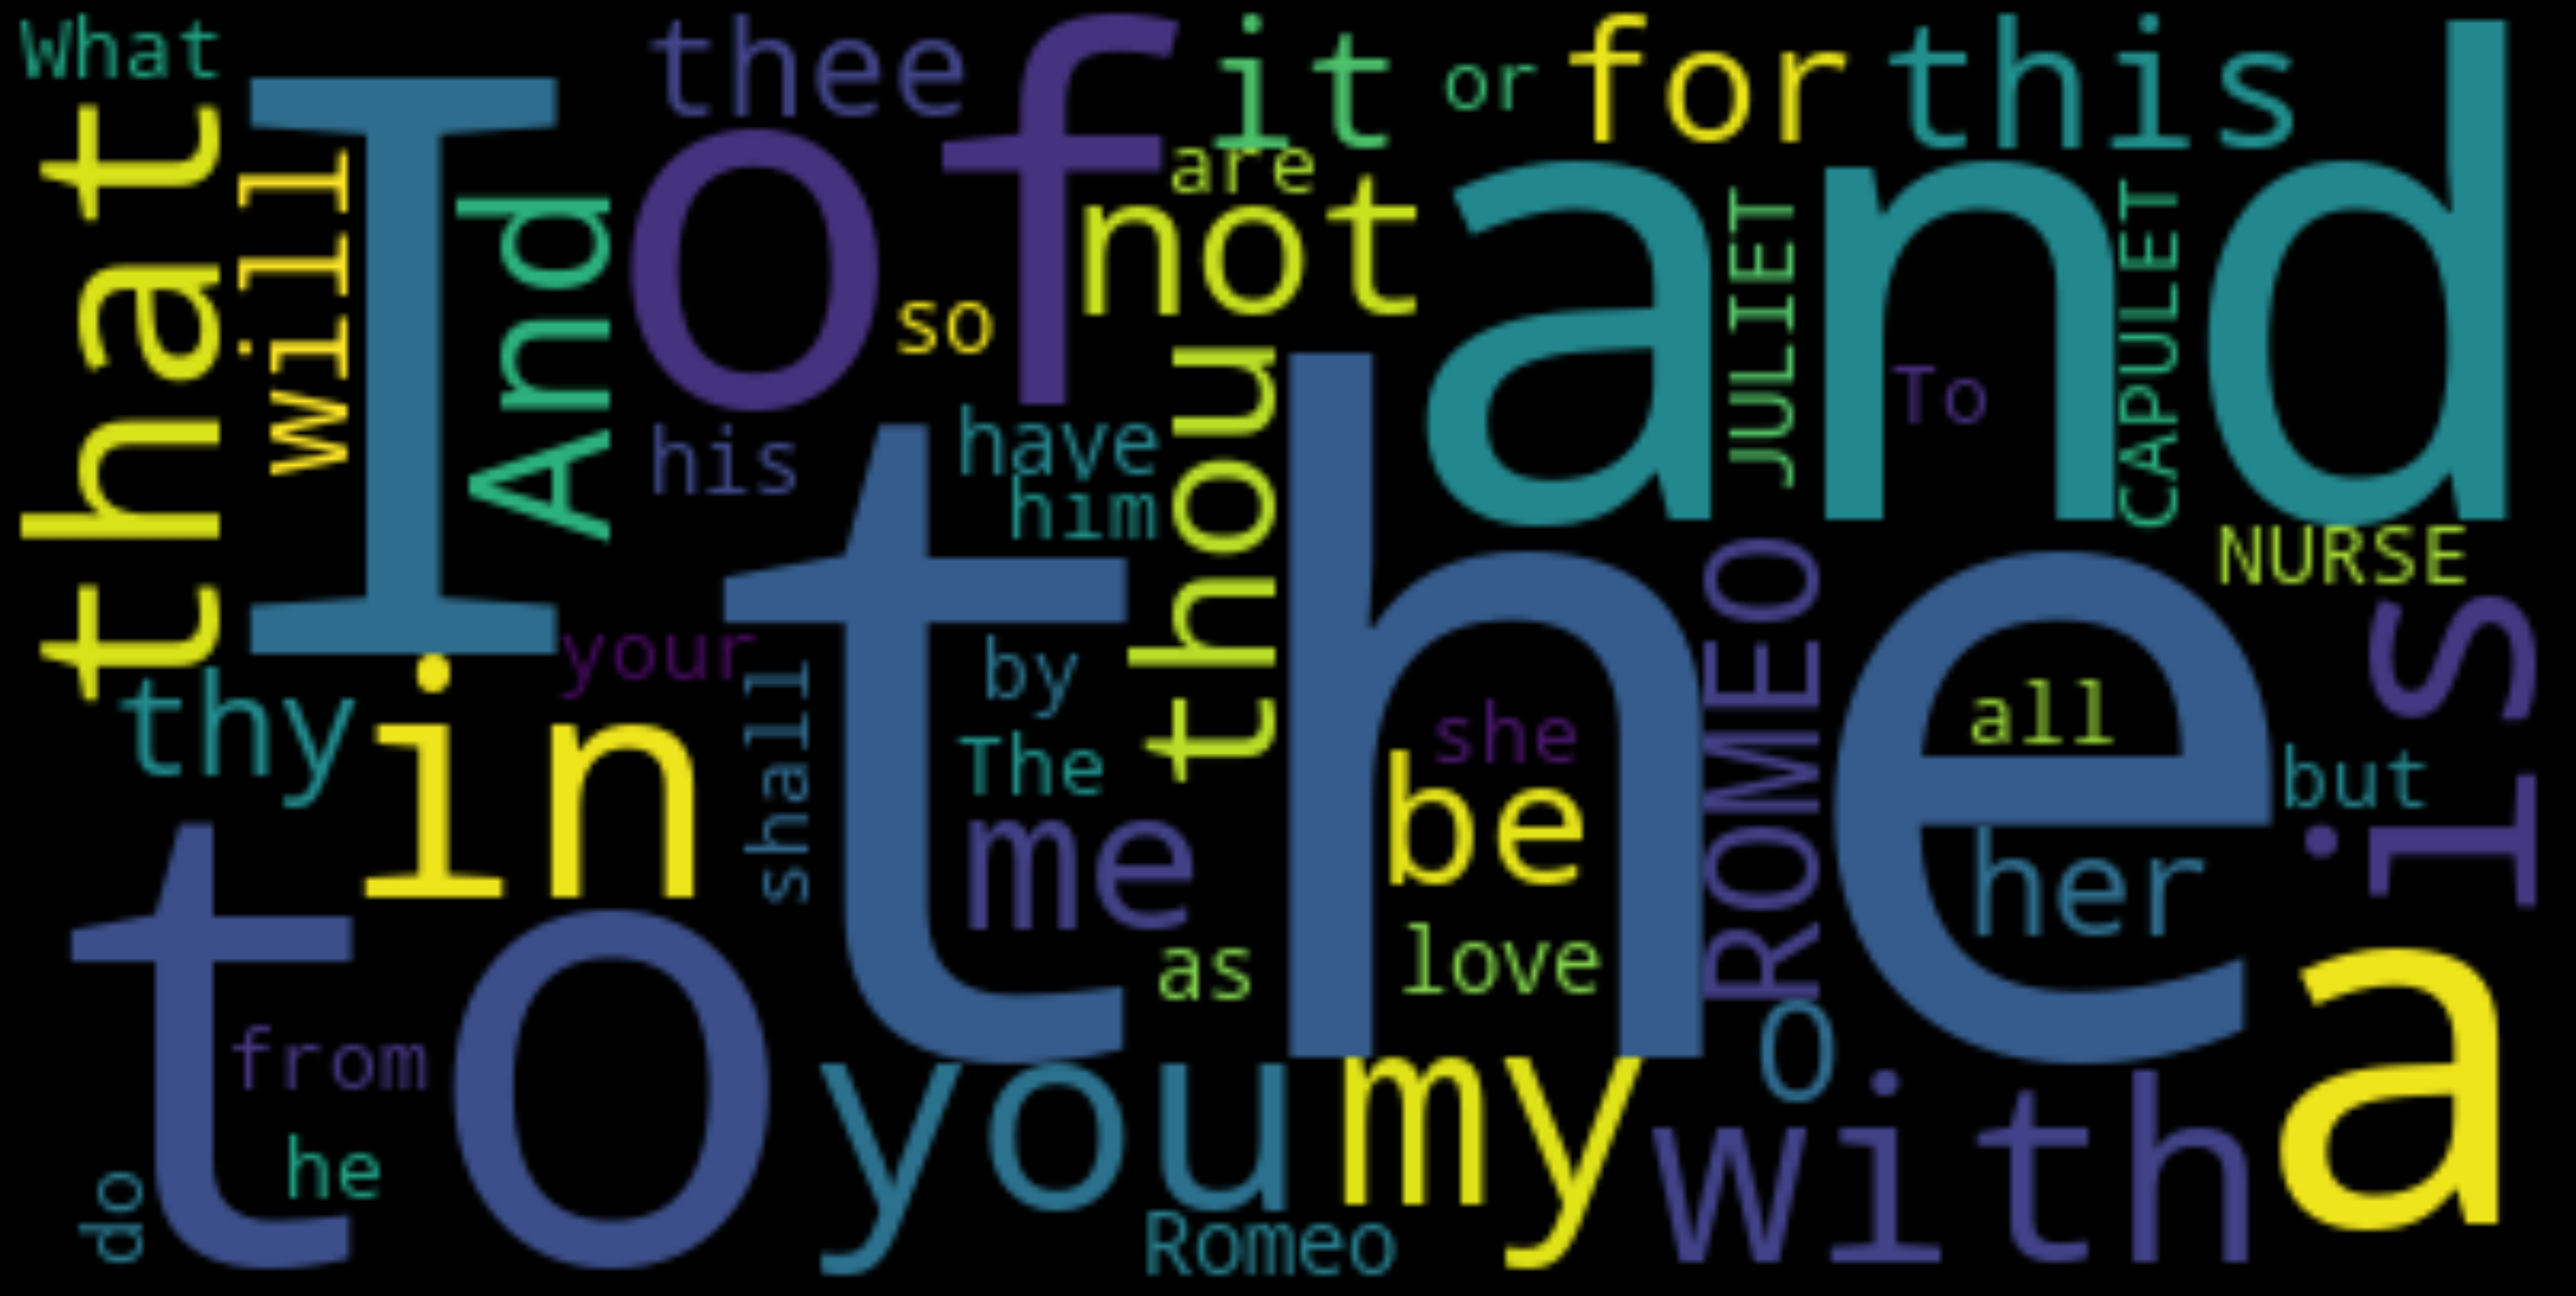

In [62]:
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()